In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


from sklearn.preprocessing import StandardScaler, LabelEncoder, MinMaxScaler


from sklearn.metrics import r2_score, mean_squared_error

from scipy.stats import boxcox
from statsmodels.stats.outliers_influence import variance_inflation_factor


from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV


from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, BaggingRegressor, GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR

from sklearn.model_selection import cross_val_score
from sklearn.decomposition import PCA

import warnings
warnings.filterwarnings("ignore")

### Loading the dataset:

In [2]:
car_df = pd.read_csv('Car_sales.csv')
car_df.head()

,Manufacturer,Model,Sales_in_thousands,__year_resale_value,Vehicle_type,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Latest_Launch,Power_perf_factor
0,Acura,Integra,16.919,16.360,Passenger,21.50,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0,2/2/2012,58.280150
1,Acura,TL,39.384,19.875,Passenger,28.40,3.2,225.0,108.1,70.3,192.9,3.517,17.2,25.0,6/3/2011,91.370778
2,Acura,CL,14.114,18.225,Passenger,NaN,3.2,225.0,106.9,70.6,192.0,3.470,17.2,26.0,1/4/2012,NaN
3,Acura,RL,8.588,29.725,Passenger,42.00,3.5,210.0,114.6,71.4,196.6,3.850,18.0,22.0,3/10/2011,91.389779
4,Audi,A4,20.397,22.255,Passenger,23.99,1.8,150.0,102.6,68.2,178.0,2.998,16.4,27.0,10/8/2011,62.777639


### Data Information:

In [3]:
car_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 157 entries, 0 to 156
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Manufacturer         157 non-null    object 
 1   Model                157 non-null    object 
 2   Sales_in_thousands   157 non-null    float64
 3   __year_resale_value  121 non-null    float64
 4   Vehicle_type         157 non-null    object 
 5   Price_in_thousands   155 non-null    float64
 6   Engine_size          156 non-null    float64
 7   Horsepower           156 non-null    float64
 8   Wheelbase            156 non-null    float64
 9   Width                156 non-null    float64
 10  Length               156 non-null    float64
 11  Curb_weight          155 non-null    float64
 12  Fuel_capacity        156 non-null    float64
 13  Fuel_efficiency      154 non-null    float64
 14  Latest_Launch        157 non-null    object 
 15  Power_perf_factor    155 non-null    flo

### Data Description:

In [4]:
car_df.describe()

,Sales_in_thousands,__year_resale_value,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Power_perf_factor
count,157.000000,121.000000,155.000000,156.000000,156.000000,156.000000,156.000000,156.000000,155.000000,156.000000,154.000000,155.000000
mean,52.998076,18.072975,27.390755,3.060897,185.948718,107.487179,71.150000,187.343590,3.378026,17.951923,23.844156,77.043591
std,68.029422,11.453384,14.351653,1.044653,56.700321,7.641303,3.451872,13.431754,0.630502,3.887921,4.282706,25.142664
min,0.110000,5.160000,9.235000,1.000000,55.000000,92.600000,62.600000,149.400000,1.895000,10.300000,15.000000,23.276272
25%,14.114000,11.260000,18.017500,2.300000,149.500000,103.000000,68.400000,177.575000,2.971000,15.800000,21.000000,60.407707
50%,29.450000,14.180000,22.799000,3.000000,177.500000,107.000000,70.550000,187.900000,3.342000,17.200000,24.000000,72.030917
75%,67.956000,19.875000,31.947500,3.575000,215.000000,112.200000,73.425000,196.125000,3.799500,19.575000,26.000000,89.414878
max,540.561000,67.550000,85.500000,8.000000,450.000000,138.700000,79.900000,224.500000,5.572000,32.000000,45.000000,188.144323


### Checking Missing Values:

In [5]:
car_df.isna().sum()

Manufacturer            0
Model                   0
Sales_in_thousands      0
__year_resale_value    36
Vehicle_type            0
Price_in_thousands      2
Engine_size             1
Horsepower              1
Wheelbase               1
Width                   1
Length                  1
Curb_weight             2
Fuel_capacity           1
Fuel_efficiency         3
Latest_Launch           0
Power_perf_factor       2
dtype: int64

### Handling Missing Values:

In [6]:
car_df['__year_resale_value'].fillna(car_df['__year_resale_value'].median(), inplace = True)
car_df['Price_in_thousands'].fillna(car_df['Price_in_thousands'].median(), inplace = True)
car_df['Engine_size'].fillna(car_df['Engine_size'].median(), inplace = True)
car_df['Horsepower'].fillna(car_df['Horsepower'].median(), inplace = True)
car_df['Wheelbase'].fillna(car_df['Wheelbase'].median(), inplace = True)
car_df['Width'].fillna(car_df['Wheelbase'].median(), inplace = True)
car_df['Length'].fillna(car_df['Length'].median(), inplace = True)
car_df['Curb_weight'].fillna(car_df['Curb_weight'].median(), inplace = True)
car_df['Fuel_capacity'].fillna(car_df['Fuel_capacity'].median(), inplace = True)
car_df['Fuel_efficiency'].fillna(car_df['Fuel_efficiency'].median(), inplace = True)
car_df['Power_perf_factor'].fillna(car_df['Power_perf_factor'].median(), inplace = True)

In [7]:
car_df.isna().sum()

Manufacturer           0
Model                  0
Sales_in_thousands     0
__year_resale_value    0
Vehicle_type           0
Price_in_thousands     0
Engine_size            0
Horsepower             0
Wheelbase              0
Width                  0
Length                 0
Curb_weight            0
Fuel_capacity          0
Fuel_efficiency        0
Latest_Launch          0
Power_perf_factor      0
dtype: int64

In [8]:
car_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 157 entries, 0 to 156
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Manufacturer         157 non-null    object 
 1   Model                157 non-null    object 
 2   Sales_in_thousands   157 non-null    float64
 3   __year_resale_value  157 non-null    float64
 4   Vehicle_type         157 non-null    object 
 5   Price_in_thousands   157 non-null    float64
 6   Engine_size          157 non-null    float64
 7   Horsepower           157 non-null    float64
 8   Wheelbase            157 non-null    float64
 9   Width                157 non-null    float64
 10  Length               157 non-null    float64
 11  Curb_weight          157 non-null    float64
 12  Fuel_capacity        157 non-null    float64
 13  Fuel_efficiency      157 non-null    float64
 14  Latest_Launch        157 non-null    object 
 15  Power_perf_factor    157 non-null    flo

### Exploratory Data Analysis:

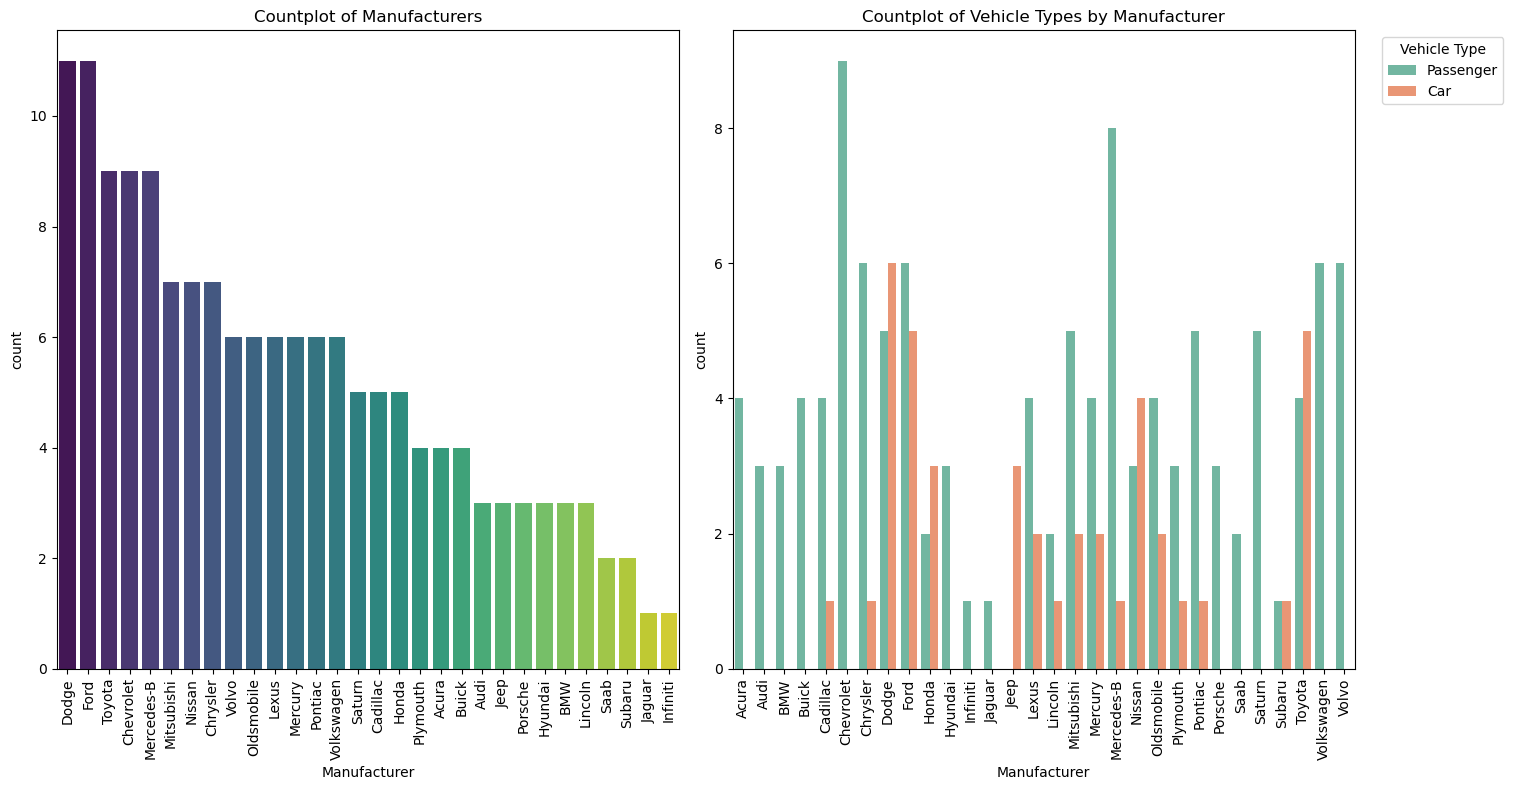

In [9]:
# Set up the matplotlib figure
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 8))

# Plot Countplot of Manufacturers
sns.countplot(x='Manufacturer', data=car_df, palette='viridis', order=car_df['Manufacturer'].value_counts().index, ax=axes[0])
axes[0].set_title('Countplot of Manufacturers')
axes[0].tick_params(axis='x', rotation=90)

# Plot Countplot of Vehicle Types by Manufacturer
sns.countplot(x='Manufacturer', hue='Vehicle_type', data=car_df, palette='Set2', ax=axes[1])
axes[1].set_title('Countplot of Vehicle Types by Manufacturer')
axes[1].legend(title='Vehicle Type', loc='upper right', bbox_to_anchor=(1.25, 1))
axes[1].tick_params(axis='x', rotation=90)
# Adjust layout
plt.tight_layout()
plt.show()

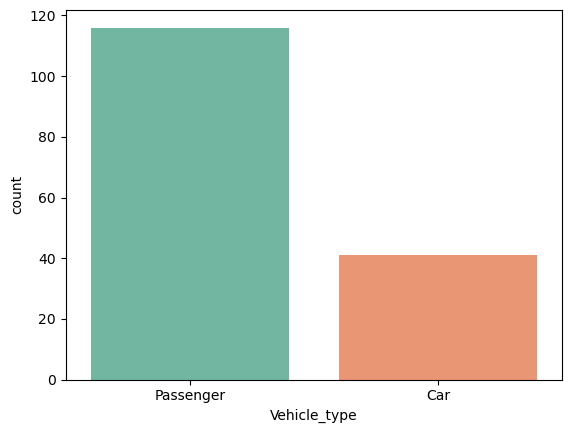

In [10]:
sns.countplot(x='Vehicle_type', data=car_df, palette='Set2')
plt.show()

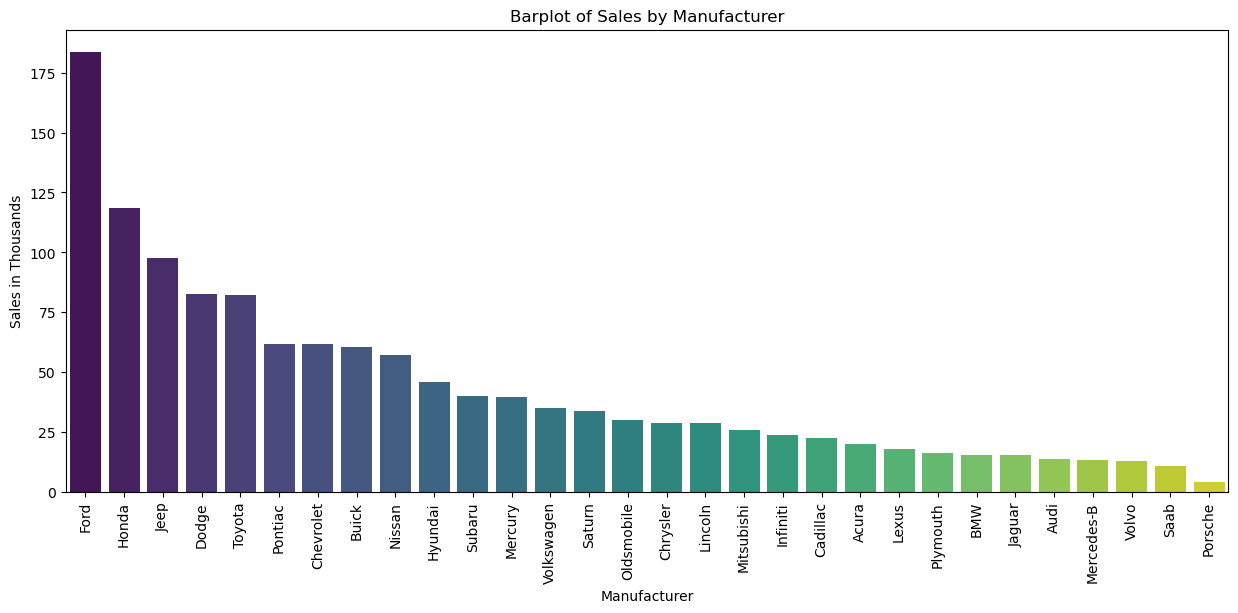

In [11]:
# Set up the matplotlib figure
plt.figure(figsize=(15, 6))

# Plot Barplot of Sales by Manufacturer
sns.barplot(x='Manufacturer', y='Sales_in_thousands', data=car_df, palette='viridis', 
            order=car_df.groupby('Manufacturer')['Sales_in_thousands'].mean().sort_values(ascending=False).index, 
            ci = None)
plt.title('Barplot of Sales by Manufacturer')
plt.xlabel('Manufacturer')
plt.ylabel('Sales in Thousands')
plt.xticks(rotation=90)

# Show the plot
plt.show()

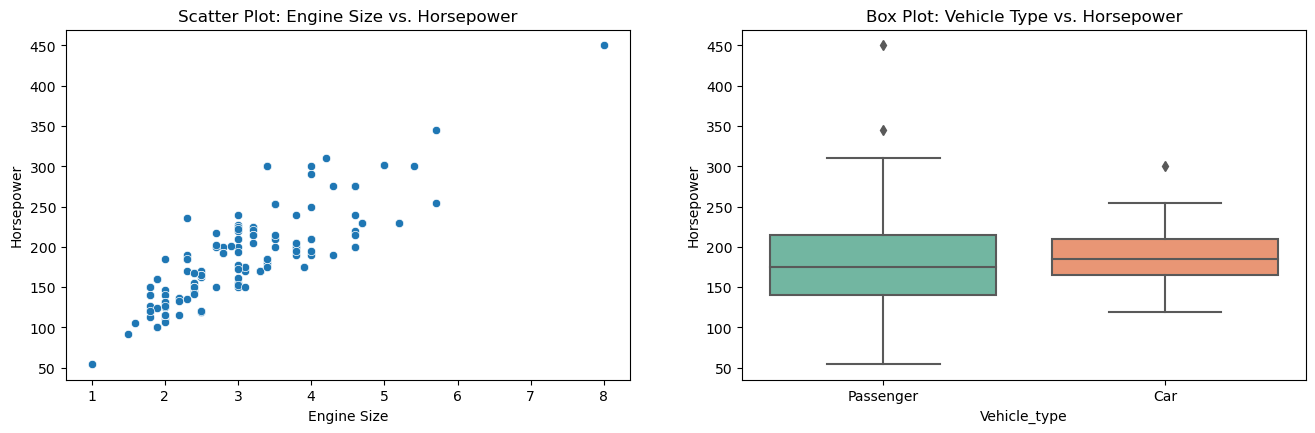

In [12]:
figure = plt.figure(figsize = [16, 10])

plt.subplot(2, 2, 1)
sns.scatterplot(x='Engine_size', y='Horsepower', data=car_df, palette='viridis')
plt.title('Scatter Plot: Engine Size vs. Horsepower')
plt.xlabel('Engine Size')
plt.ylabel('Horsepower')

plt.subplot(2, 2, 2)
sns.boxplot(x='Vehicle_type', y='Horsepower', data=car_df, palette='Set2')
plt.title('Box Plot: Vehicle Type vs. Horsepower')

plt.show()

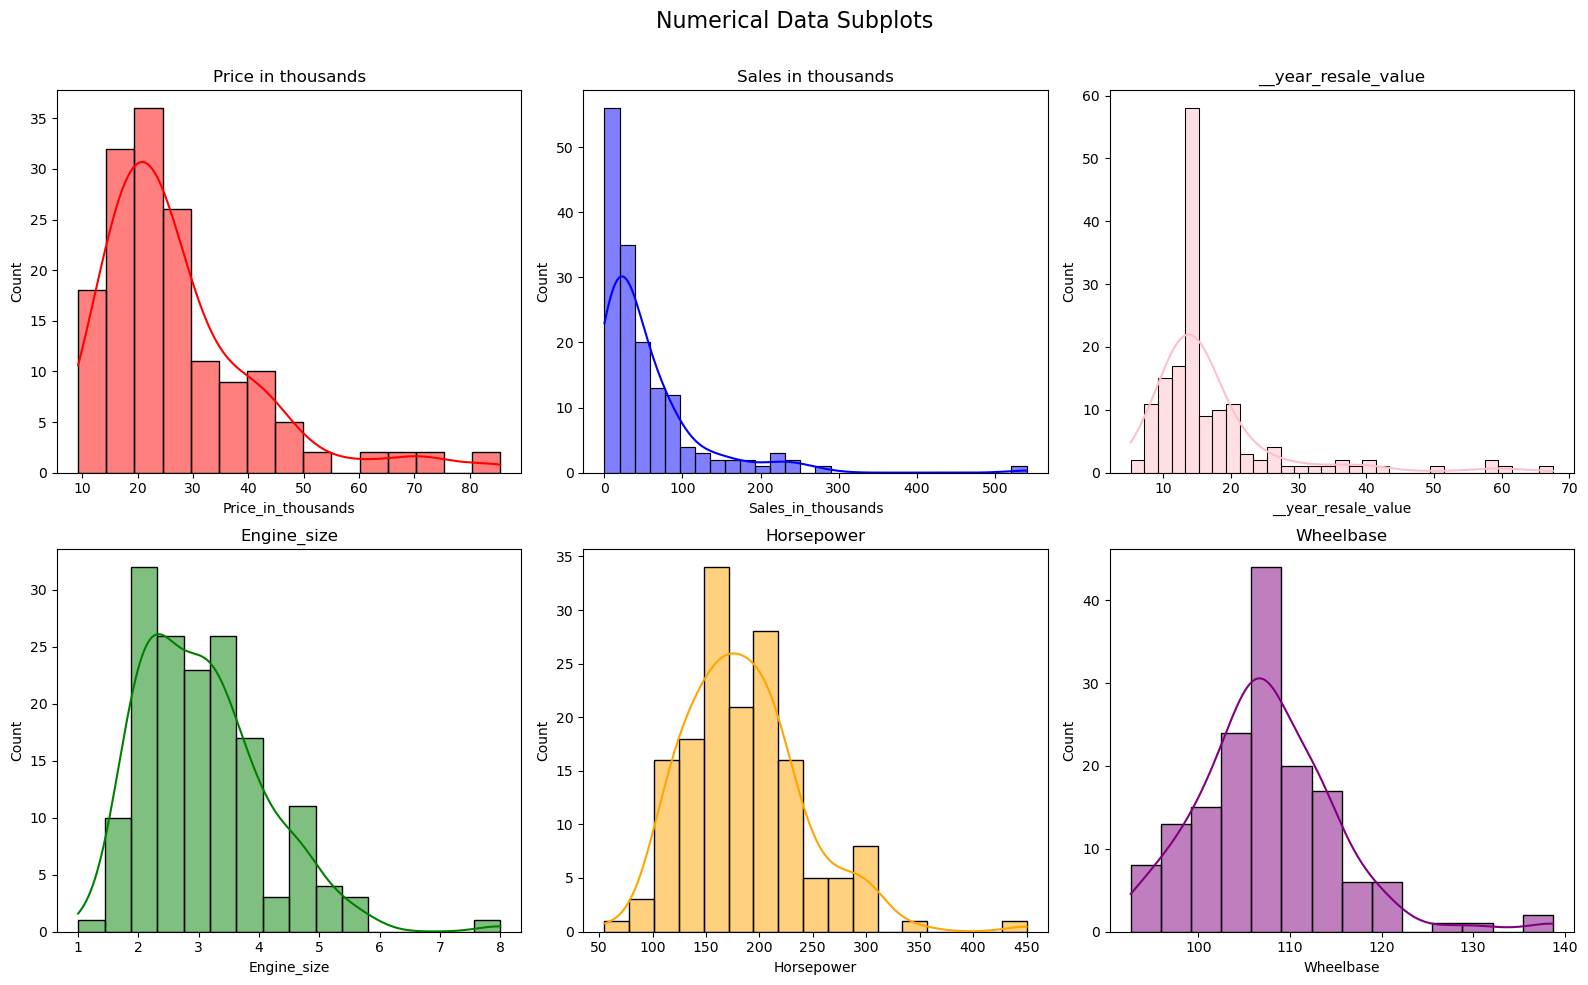

In [13]:
fig, axes = plt.subplots(2, 3, figsize=(16, 10))
fig.suptitle("Numerical Data Subplots", fontsize=16)

# Subplot 1:
sns.histplot(data=car_df, x="Price_in_thousands", kde=True, ax=axes[0, 0], color='red')
axes[0, 0].set_title("Price in thousands")

# Subplot 2: 
sns.histplot(data=car_df, x="Sales_in_thousands", kde=True, ax=axes[0, 1], color='blue')
axes[0, 1].set_title("Sales in thousands")

# Subplot 3: 
sns.histplot(data=car_df, x="__year_resale_value", kde=True, ax=axes[0, 2], color='pink')
axes[0, 2].set_title("__year_resale_value")

# Subplot 4: 
sns.histplot(data=car_df, x="Engine_size", kde=True, ax=axes[1, 0], color='green')
axes[1, 0].set_title("Engine_size")

# Subplot 5: 
sns.histplot(data=car_df, x="Horsepower", kde=True, ax=axes[1, 1], color='orange')
axes[1, 1].set_title("Horsepower")

# Subplot 6: 
sns.histplot(data=car_df, x="Wheelbase", kde=True, ax=axes[1, 2], color='purple')
axes[1, 2].set_title("Wheelbase")

# Adjust subplot layout
plt.tight_layout()
plt.subplots_adjust(top=0.9)

plt.show()


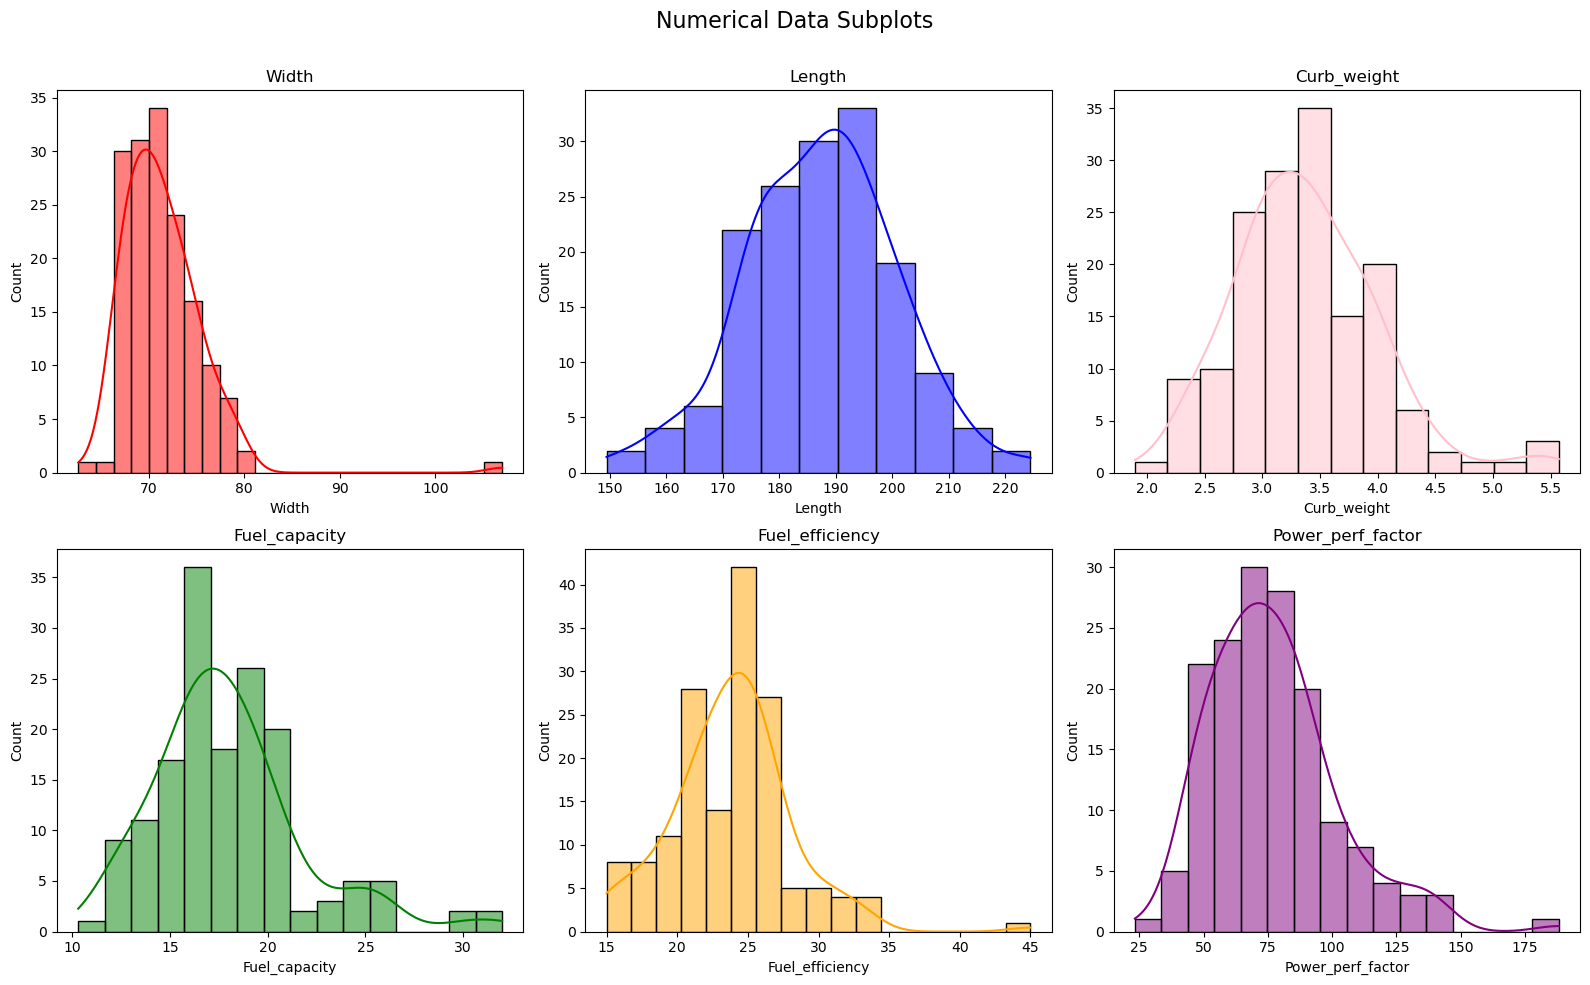

In [14]:
fig, axes = plt.subplots(2, 3, figsize=(16, 10))
fig.suptitle("Numerical Data Subplots", fontsize=16)

# Subplot 1:
sns.histplot(data=car_df, x="Width", kde=True, ax=axes[0, 0], color='red')
axes[0, 0].set_title("Width")

# Subplot 2: 
sns.histplot(data=car_df, x="Length", kde=True, ax=axes[0, 1], color='blue')
axes[0, 1].set_title("Length")

# Subplot 3: 
sns.histplot(data=car_df, x="Curb_weight", kde=True, ax=axes[0, 2], color='pink')
axes[0, 2].set_title("Curb_weight")

# Subplot 4: 
sns.histplot(data=car_df, x="Fuel_capacity", kde=True, ax=axes[1, 0], color='green')
axes[1, 0].set_title("Fuel_capacity")

# Subplot 5: 
sns.histplot(data=car_df, x="Fuel_efficiency", kde=True, ax=axes[1, 1], color='orange')
axes[1, 1].set_title("Fuel_efficiency")

# Subplot 6: 
sns.histplot(data=car_df, x="Power_perf_factor", kde=True, ax=axes[1, 2], color='purple')
axes[1, 2].set_title("Power_perf_factor")

# Adjust subplot layout
plt.tight_layout()
plt.subplots_adjust(top=0.9)

plt.show()

In [15]:
car_df.skew()

Sales_in_thousands     3.408518
__year_resale_value    2.759608
Price_in_thousands     1.785399
Engine_size            1.104995
Horsepower             1.006492
Wheelbase              0.974177
Width                  3.403915
Length                -0.060035
Curb_weight            0.714802
Fuel_capacity          1.143576
Fuel_efficiency        0.696747
Power_perf_factor      1.084223
dtype: float64

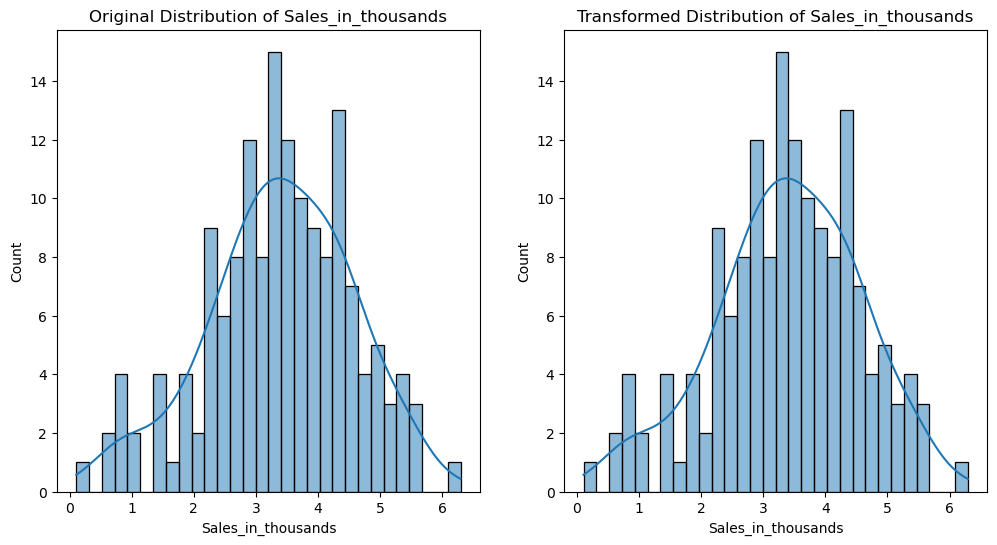

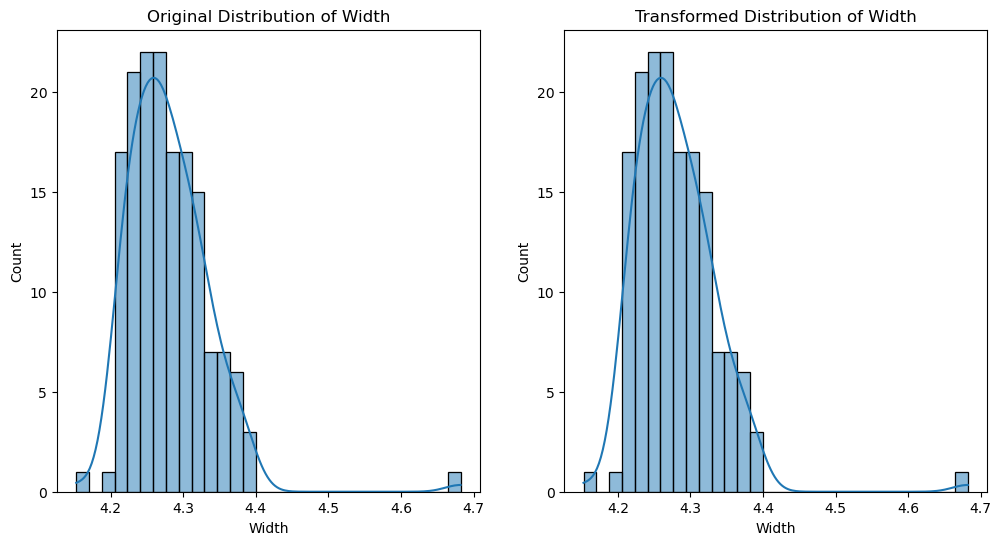

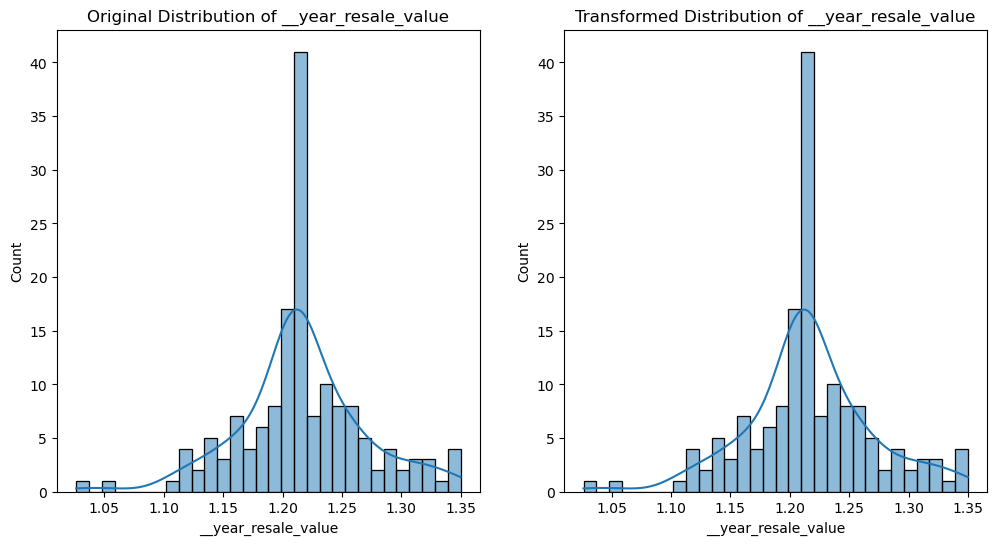

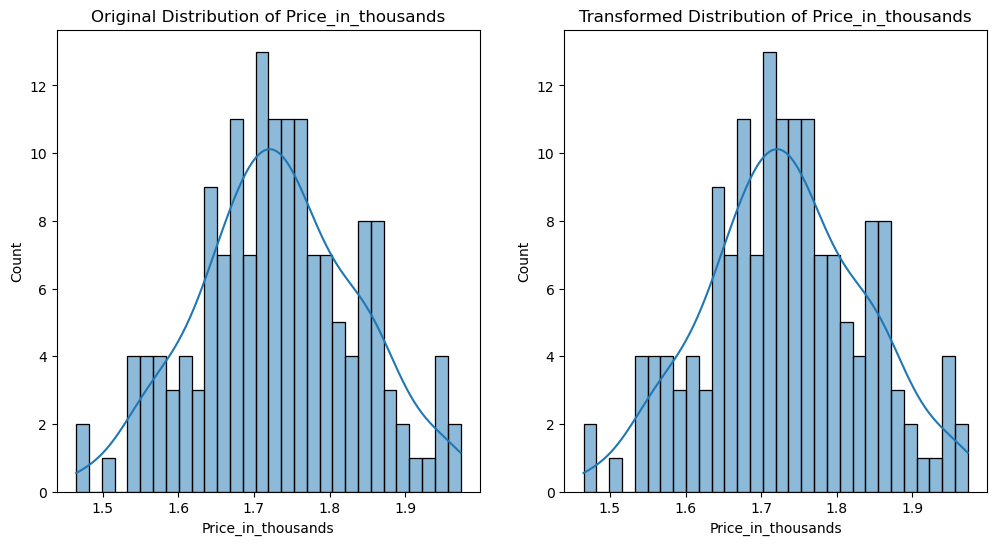

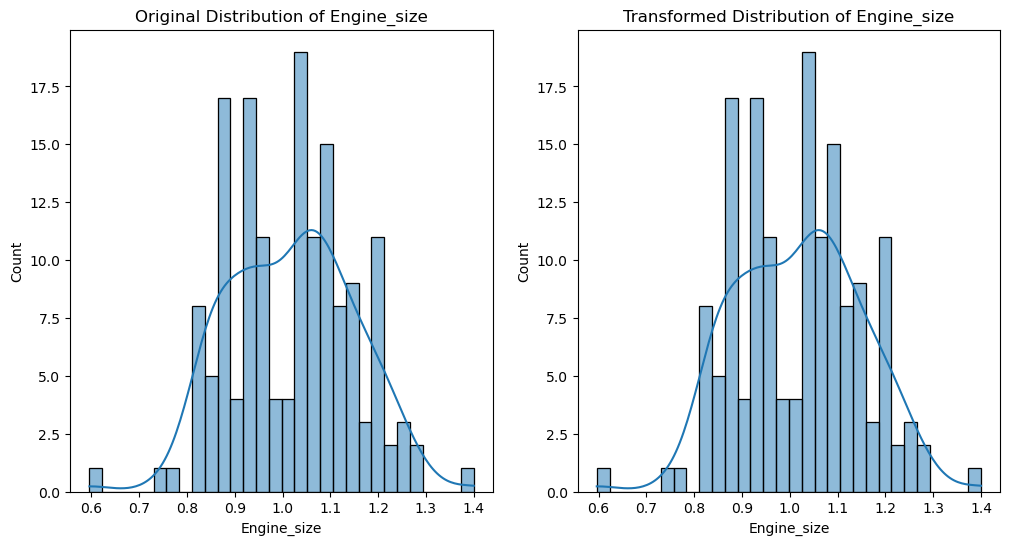

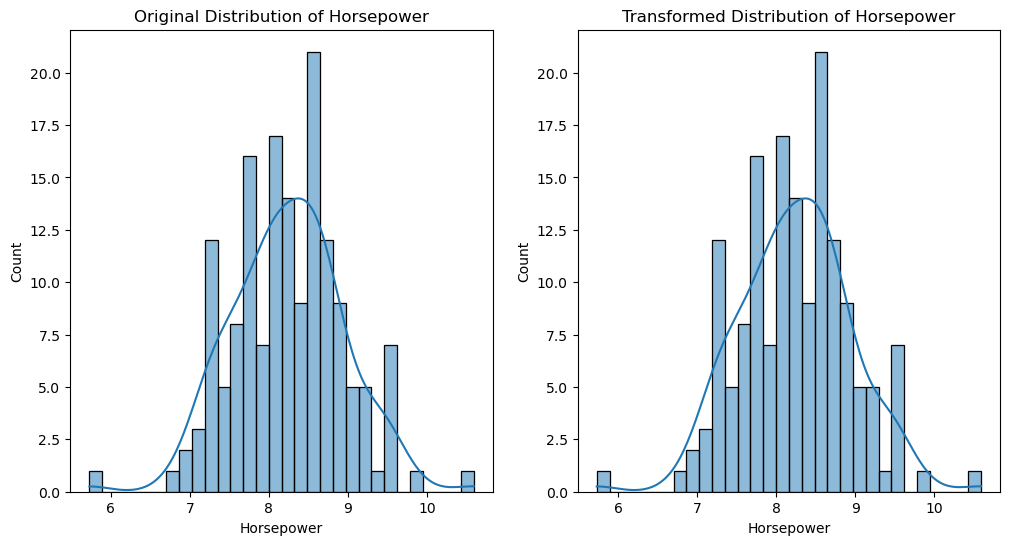

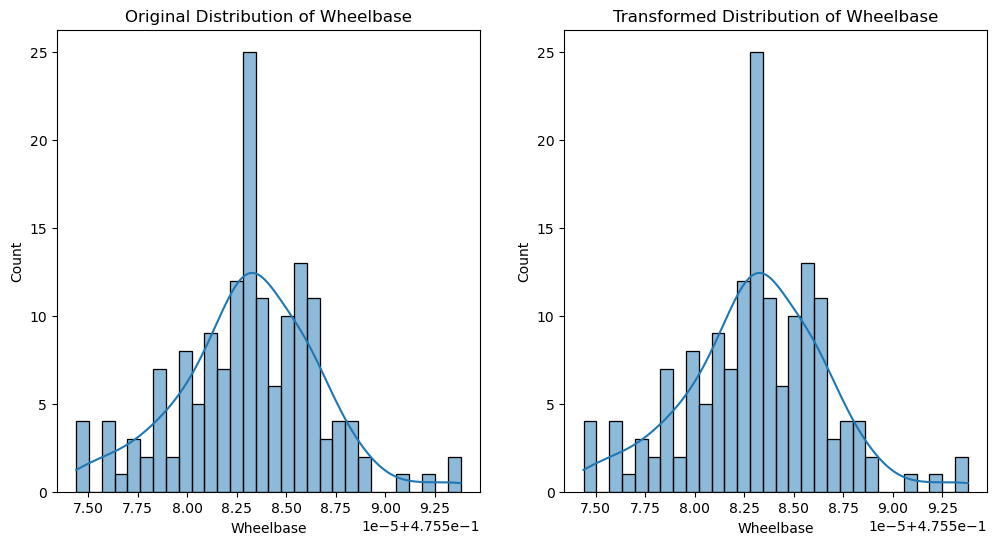

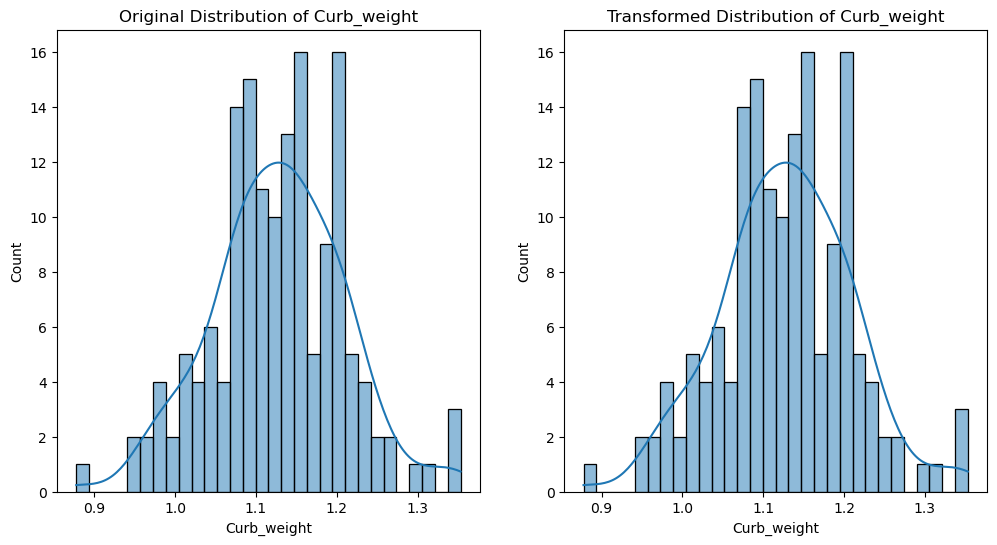

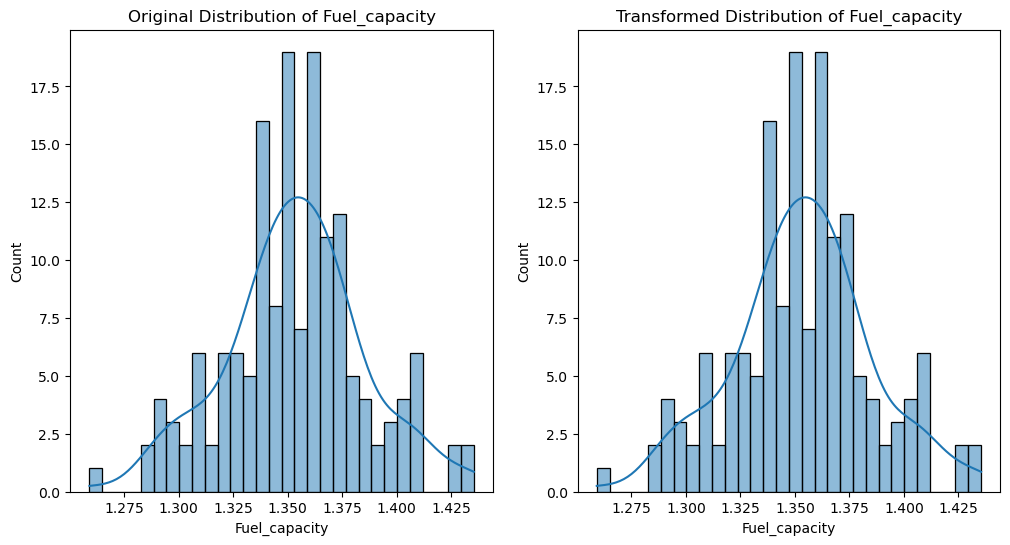

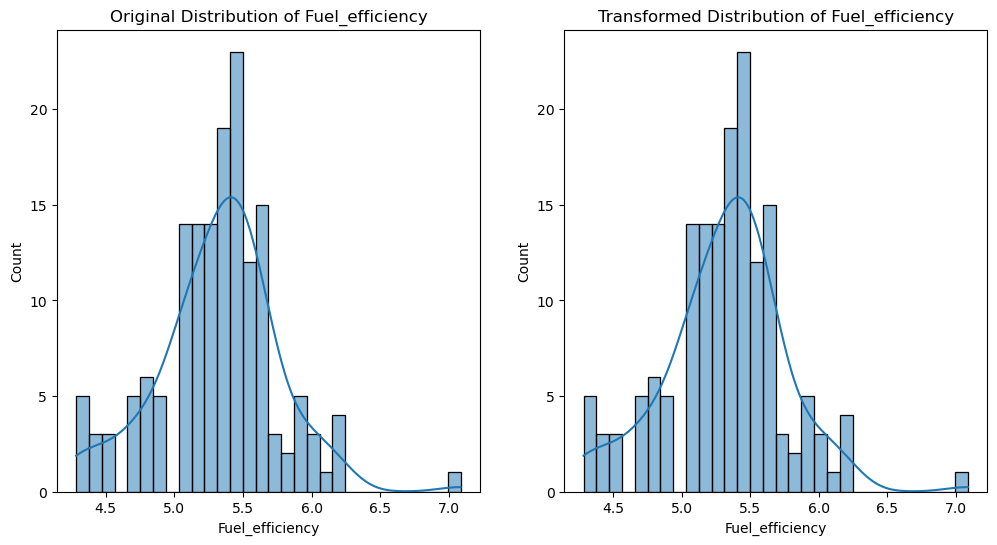

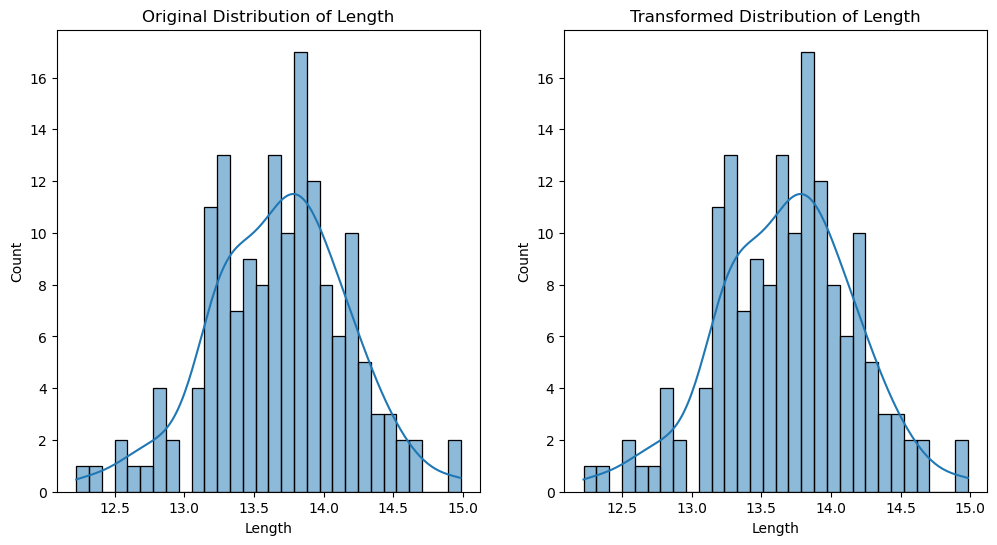

In [16]:
def plot_distribution(feature, transformed_feature):
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    sns.histplot(car_df[feature], bins=30, kde=True)
    plt.title(f'Original Distribution of {feature}')

    plt.subplot(1, 2, 2)
    sns.histplot(transformed_feature, bins=30, kde=True)
    plt.title(f'Transformed Distribution of {feature}')

    plt.show()

# Log Transformation
log_transform_features = ['Sales_in_thousands', 'Width']
for feature in log_transform_features:
    car_df[feature] = np.log1p(car_df[feature])
    plot_distribution(feature, car_df[feature])

# Box-Cox Transformation
boxcox_transform_features = ['__year_resale_value', 'Price_in_thousands', 'Engine_size', 
                              'Horsepower', 'Wheelbase', 'Curb_weight', 'Fuel_capacity', 'Fuel_efficiency']

for feature in boxcox_transform_features:
    # Adding a constant to handle zero values
    car_df[feature], _ = boxcox(car_df[feature] + 1)
    plot_distribution(feature, car_df[feature])

# Handling Length separately (near-zero skewness)
car_df['Length'] = np.sqrt(car_df['Length'])
plot_distribution('Length', car_df['Length'])

In [17]:
car_df = pd.get_dummies(columns = ['Vehicle_type'], data = car_df)

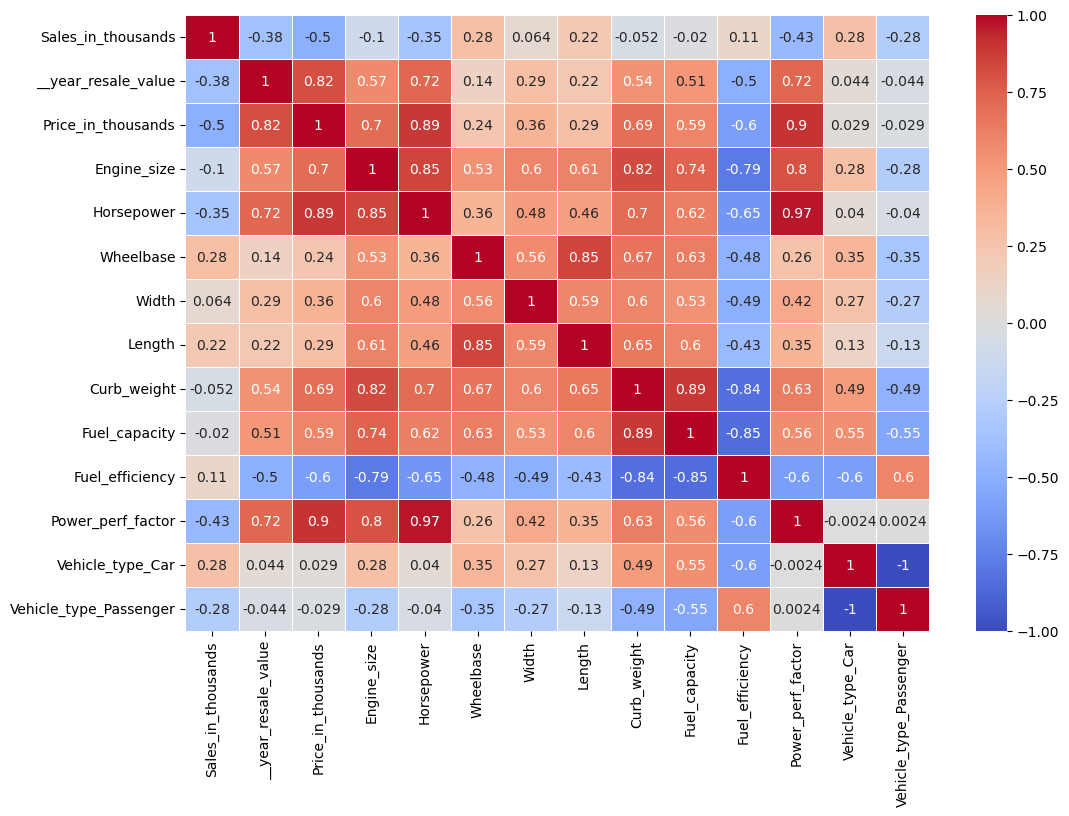

In [18]:
plt.figure(figsize=(12, 8))
sns.heatmap(car_df.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.show()

In [19]:
#Extracting year and month from Date column
car_df['Latest_Launch'] = pd.to_datetime(car_df['Latest_Launch'], format = '%m/%d/%Y')

In [20]:
car_df['Year'] = car_df['Latest_Launch'].dt.year
car_df['Month'] = car_df['Latest_Launch'].dt.month
car_df['Day'] = car_df['Latest_Launch'].dt.day

In [21]:
car_df.head()

,Manufacturer,Model,Sales_in_thousands,__year_resale_value,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Latest_Launch,Power_perf_factor,Vehicle_type_Car,Vehicle_type_Passenger,Year,Month,Day
0,Acura,Integra,2.885862,1.231392,1.708662,0.825428,7.676533,0.475580,4.223910,13.130118,1.025231,1.306972,5.754623,2012-02-02,58.280150,0,1,2012,2,2
1,Acura,TL,3.698434,1.254655,1.774158,1.059642,8.793088,0.475584,4.266896,13.888844,1.153554,1.351891,5.465221,2011-06-03,91.370778,0,1,2011,6,3
2,Acura,CL,2.715621,1.244638,1.723042,1.059642,8.793088,0.475583,4.271095,13.856406,1.147579,1.351891,5.564192,2012-01-04,72.030917,0,1,2012,1,4
3,Acura,RL,2.260512,1.294652,1.855110,1.095443,8.625058,0.475587,4.282206,14.021412,1.193574,1.359003,5.151188,2011-03-10,91.389779,0,1,2011,3,10
4,Audi,A4,3.063251,1.266941,1.735272,0.825428,7.833319,0.475581,4.237001,13.341664,1.082362,1.344256,5.660608,2011-10-08,62.777639,0,1,2011,10,8


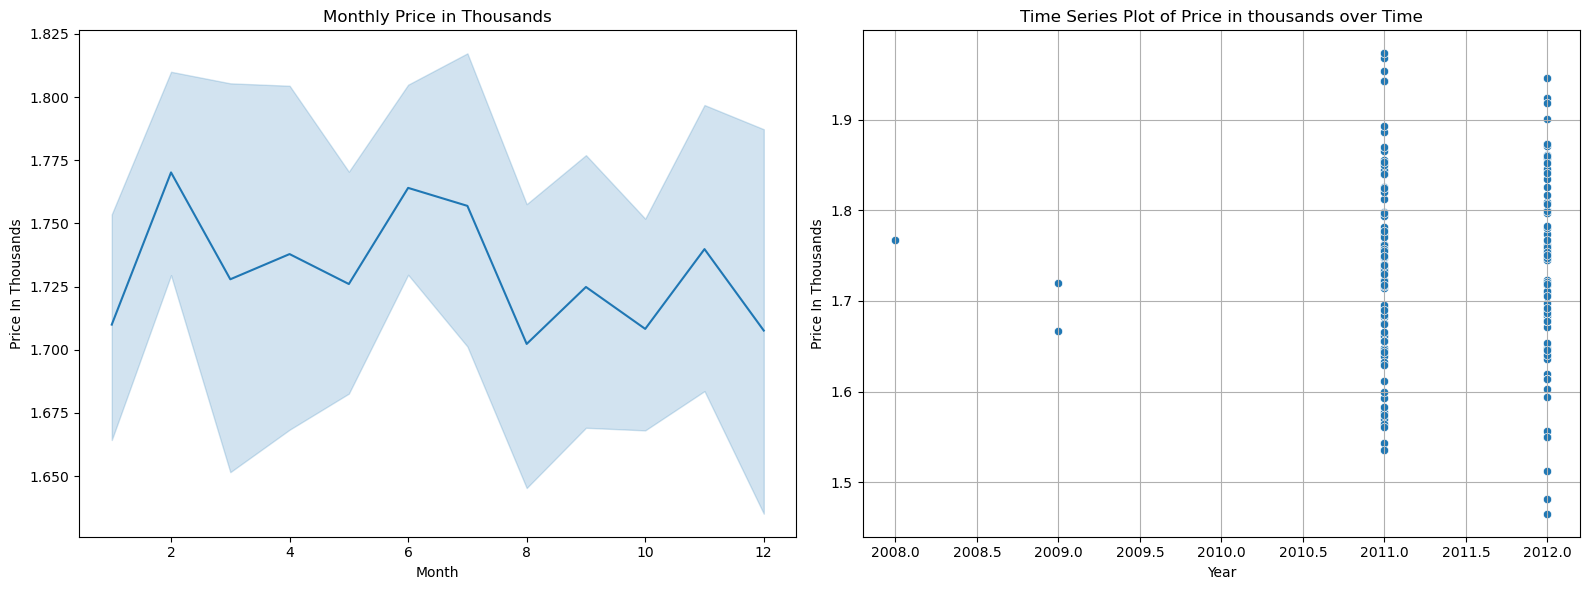

In [22]:
plt.figure(figsize=(16, 6))

plt.subplot(1, 2, 1)
sns.lineplot(x = 'Month', y = 'Price_in_thousands', data = car_df, palette='viridis')
plt.title('Monthly Price in Thousands')
plt.xlabel('Month')
plt.ylabel('Price In Thousands')
plt.tight_layout()


plt.subplot(1, 2, 2)
sns.scatterplot(x='Year', y='Price_in_thousands', data=car_df, palette='viridis')
plt.title('Time Series Plot of Price in thousands over Time')
plt.xlabel('Year')
plt.ylabel('Price In Thousands')
plt.grid(True)

plt.tight_layout()
plt.show()

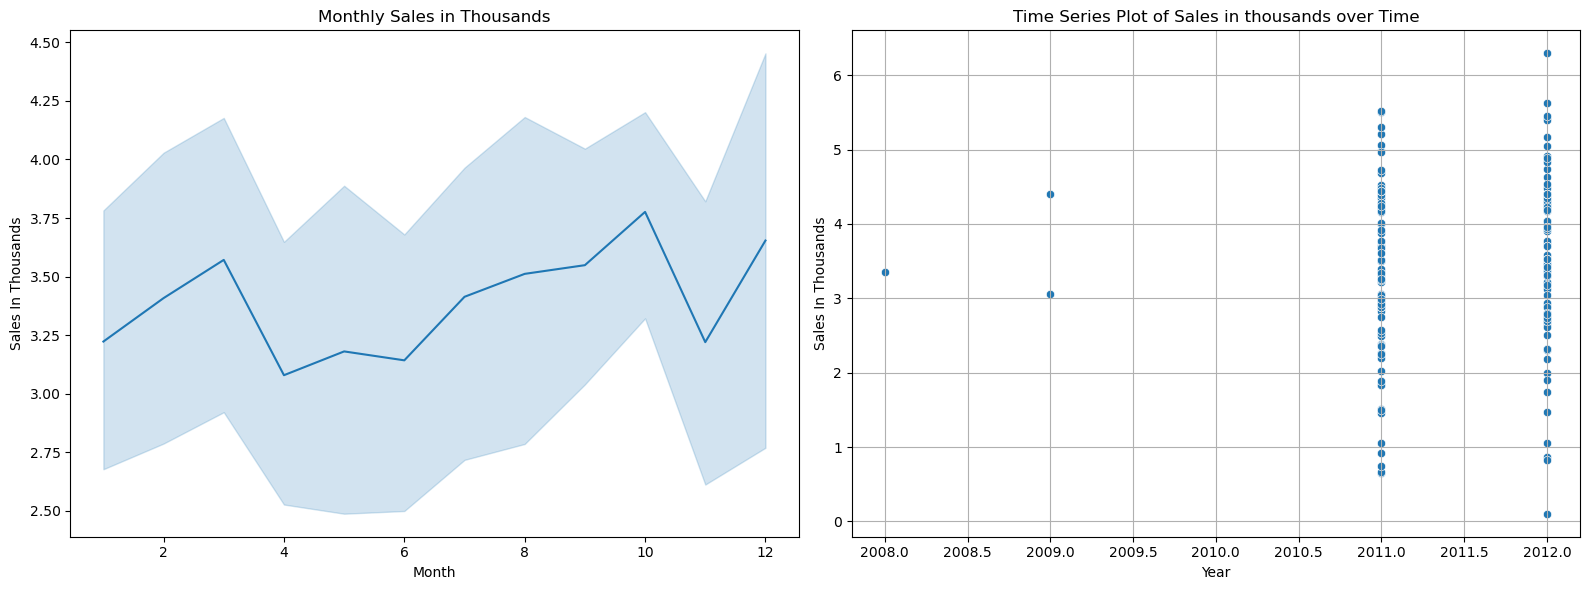

In [23]:
plt.figure(figsize=(16, 6))

plt.subplot(1, 2, 1)
sns.lineplot(x = 'Month', y = 'Sales_in_thousands', data = car_df, palette='viridis')
plt.title('Monthly Sales in Thousands')
plt.xlabel('Month')
plt.ylabel('Sales In Thousands')
plt.tight_layout()


plt.subplot(1, 2, 2)
sns.scatterplot(x='Year', y='Sales_in_thousands', data=car_df, palette='viridis')
plt.title('Time Series Plot of Sales in thousands over Time')
plt.xlabel('Year')
plt.ylabel('Sales In Thousands')
plt.grid(True)

plt.tight_layout()
plt.show()

In [24]:
car_df.drop(columns = ['Month', 'Year', 'Latest_Launch', 'Day', 'Model', 'Manufacturer'], axis = 1, inplace = True)

In [25]:
car_df.head()

,Sales_in_thousands,__year_resale_value,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Power_perf_factor,Vehicle_type_Car,Vehicle_type_Passenger
0,2.885862,1.231392,1.708662,0.825428,7.676533,0.475580,4.223910,13.130118,1.025231,1.306972,5.754623,58.280150,0,1
1,3.698434,1.254655,1.774158,1.059642,8.793088,0.475584,4.266896,13.888844,1.153554,1.351891,5.465221,91.370778,0,1
2,2.715621,1.244638,1.723042,1.059642,8.793088,0.475583,4.271095,13.856406,1.147579,1.351891,5.564192,72.030917,0,1
3,2.260512,1.294652,1.855110,1.095443,8.625058,0.475587,4.282206,14.021412,1.193574,1.359003,5.151188,91.389779,0,1
4,3.063251,1.266941,1.735272,0.825428,7.833319,0.475581,4.237001,13.341664,1.082362,1.344256,5.660608,62.777639,0,1


Sales_in_thousands


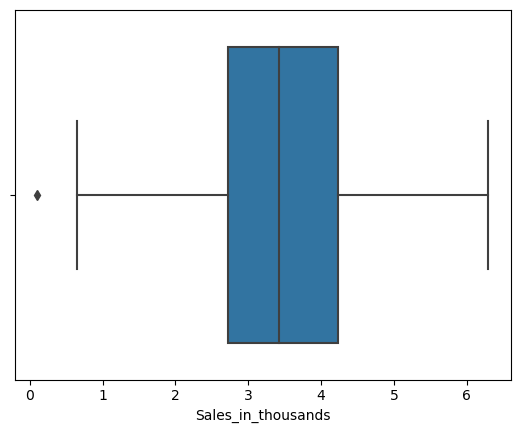

__year_resale_value


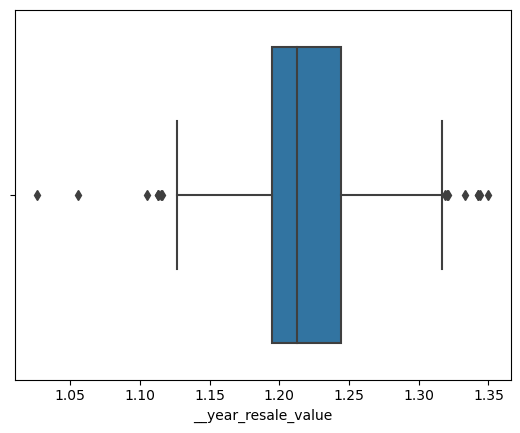

Price_in_thousands


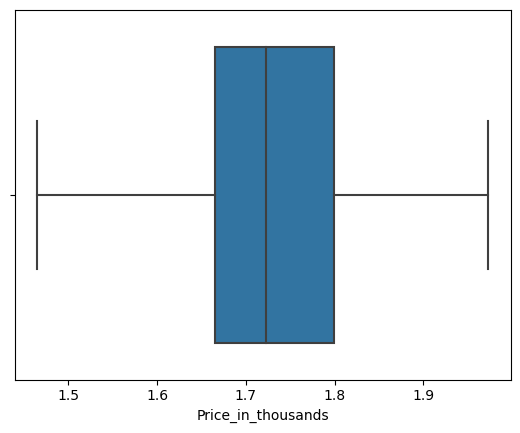

Engine_size


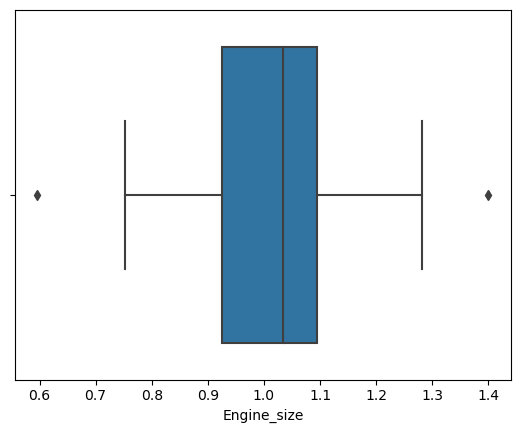

Horsepower


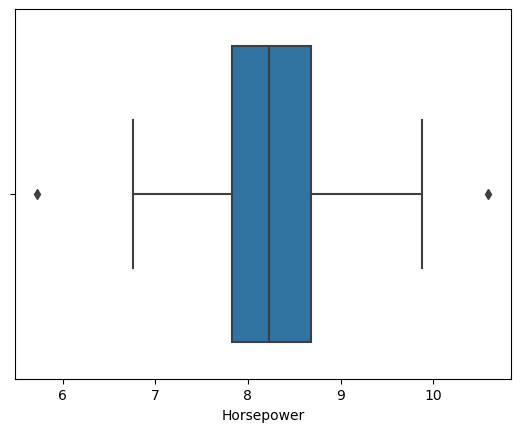

Wheelbase


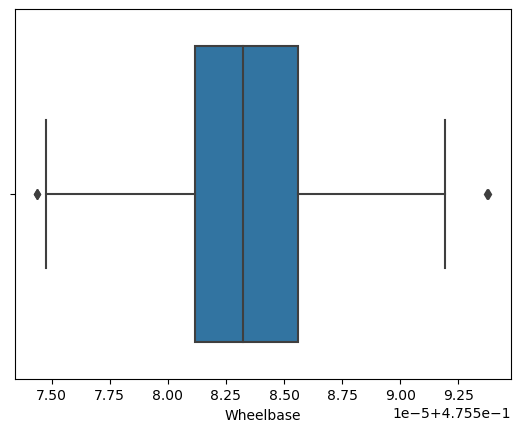

Width


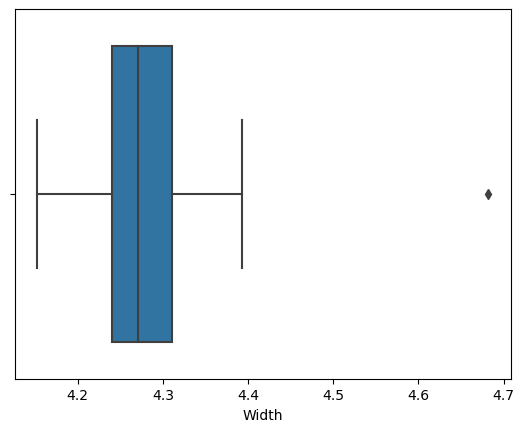

Length


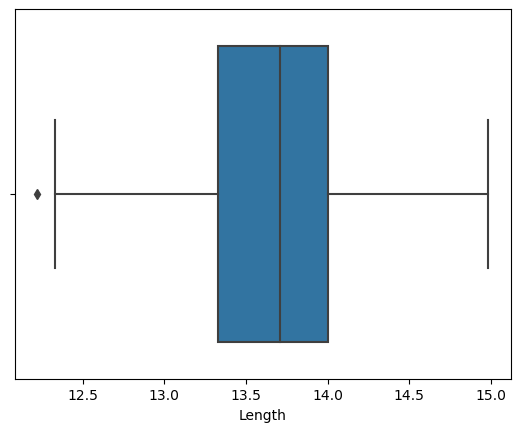

Curb_weight


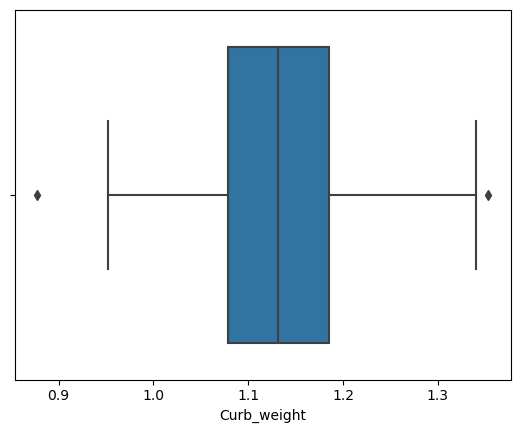

Fuel_capacity


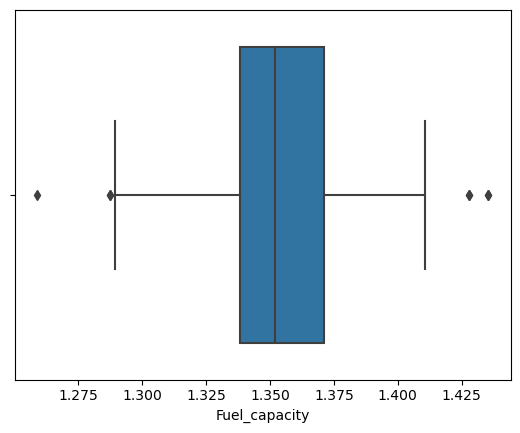

Fuel_efficiency


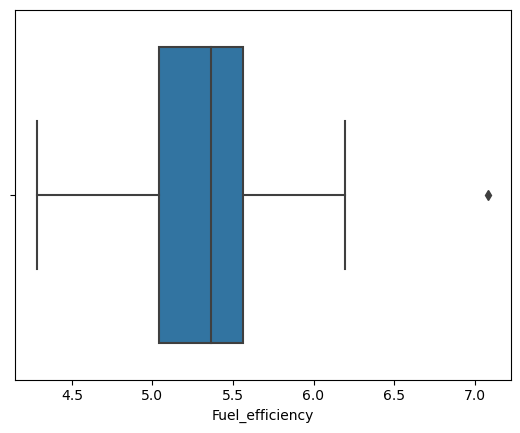

Power_perf_factor


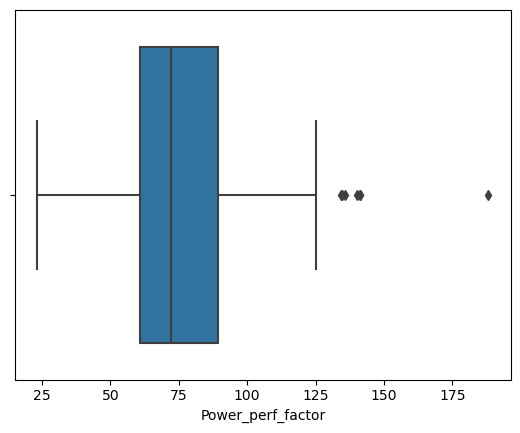

Vehicle_type_Car


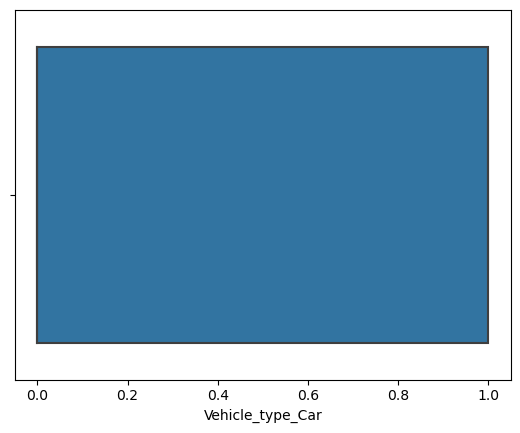

Vehicle_type_Passenger


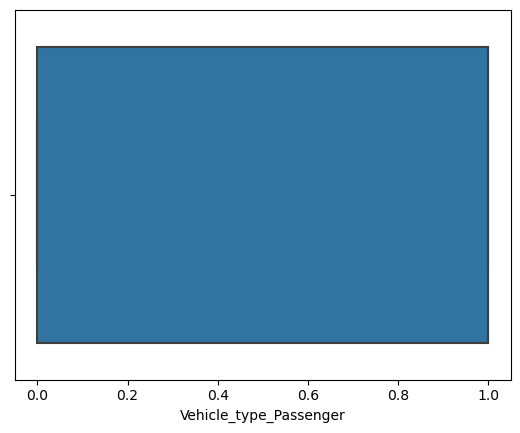

In [26]:
for col in car_df.iloc[:,:].columns:
    print(col)
    sns.boxplot(x = car_df[col], data = car_df)
    plt.show()

In [27]:
def get_bounds(car_df, col):
    Q1 = car_df[col].quantile(0.25)
    Q3 = car_df[col].quantile(0.75)
    IQR = Q3-Q1
    Upper = Q3+(1.5*IQR)
    Lower = Q1-(1.5*IQR)
    return Upper, Lower

In [28]:
num_cols = ['Sales_in_thousands','__year_resale_value', 'Price_in_thousands', 'Engine_size', 'Horsepower',
            'Wheelbase', 'Width', 'Length', 'Curb_weight', 'Fuel_capacity', 'Fuel_efficiency', 'Power_perf_factor']

In [29]:
for col in num_cols:
    Upper, Lower = get_bounds(car_df, col)
    car_df[col] = np.where(car_df[col]>Upper, Upper, car_df[col])
    car_df[col] = np.where(car_df[col]<Lower, Lower, car_df[col])

Sales_in_thousands


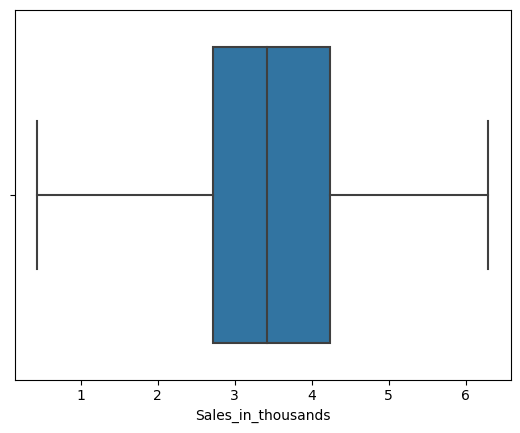

__year_resale_value


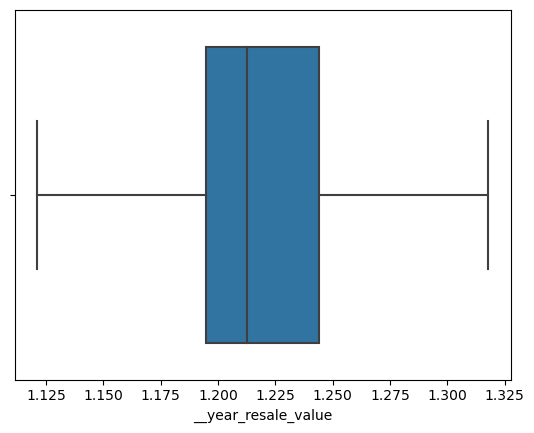

Price_in_thousands


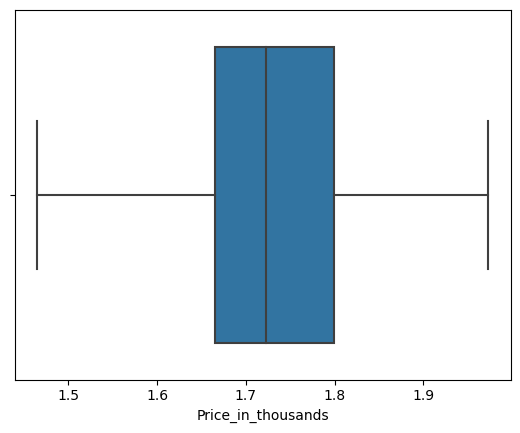

Engine_size


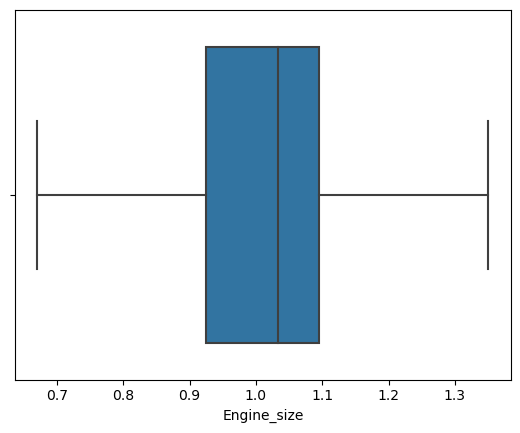

Horsepower


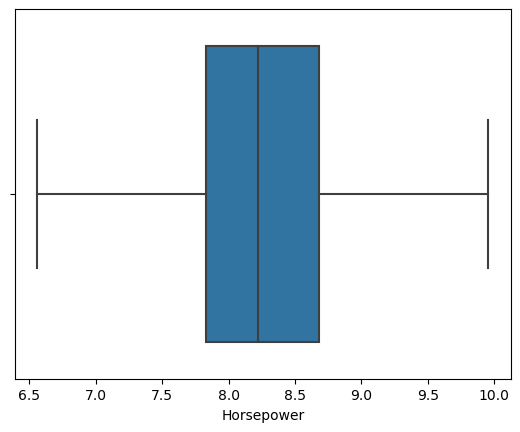

Wheelbase


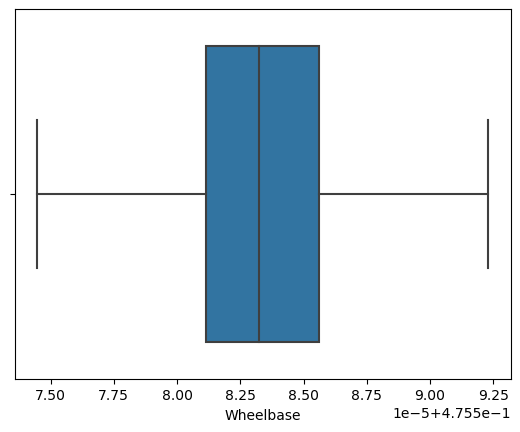

Width


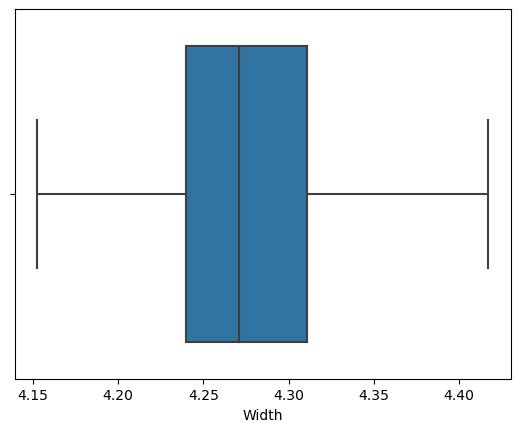

Length


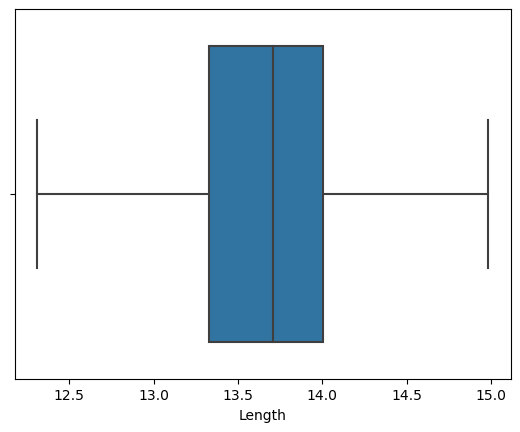

Curb_weight


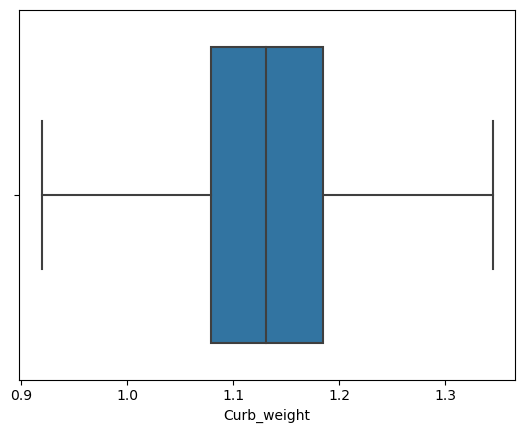

Fuel_capacity


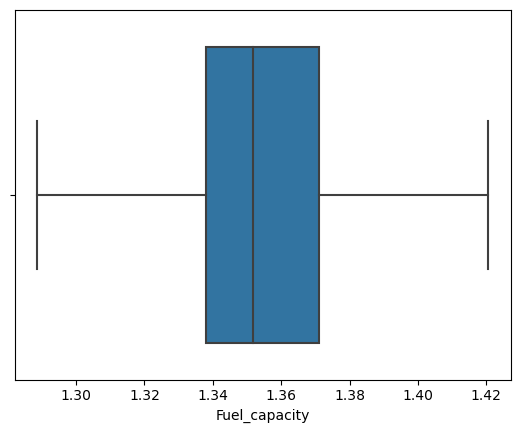

Fuel_efficiency


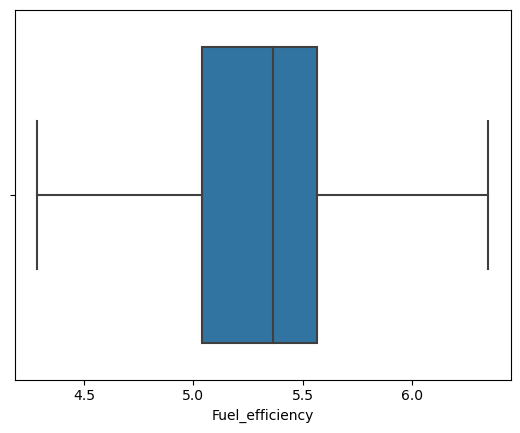

Power_perf_factor


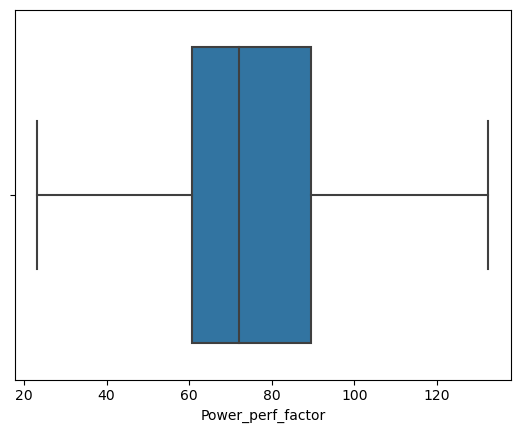

Vehicle_type_Car


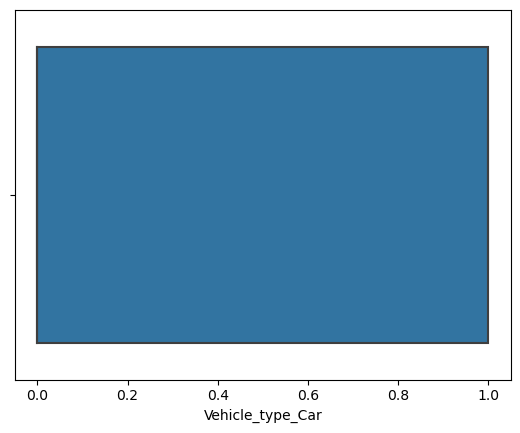

Vehicle_type_Passenger


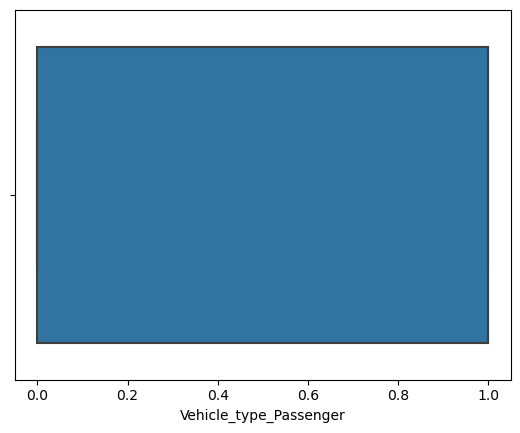

In [30]:
for col in car_df.iloc[:,:].columns:
    print(col)
    sns.boxplot(x = car_df[col], data = car_df)
    plt.show()

### Splitting the data in X and Y:

In [31]:
x = car_df.drop('Price_in_thousands', axis = 1)
y = car_df['Price_in_thousands']

In [32]:
# Function to calculate VIF
def calculate_vif(data_frame):
    vif_data = pd.DataFrame()
    vif_data["Variable"] = data_frame.columns
    vif_data["VIF"] = [variance_inflation_factor(data_frame.values, i) for i in range(data_frame.shape[1])]
    return vif_data

# Calculate VIF for the features
vif_results = calculate_vif(x)

# Display the VIF results
print("VIF Results:")
print(vif_results)

# Identify features with high VIF
high_vif_features = vif_results[vif_results['VIF'] > 10]['Variable']

# Remove features with high VIF
x_no_multicollinearity = x.drop(high_vif_features, axis=1)

# Display the columns after dropping high VIF features
print("Columns after dropping high VIF features:")
for column in x_no_multicollinearity.columns:
    print(column)

VIF Results:
                  Variable           VIF
0       Sales_in_thousands  1.901298e+00
1      __year_resale_value  2.366359e+00
2              Engine_size  7.838933e+00
3               Horsepower  3.367014e+01
4                Wheelbase  4.911412e+00
5                    Width  2.715286e+00
6                   Length  5.939981e+00
7              Curb_weight  8.593786e+00
8            Fuel_capacity  6.521148e+00
9          Fuel_efficiency  6.762035e+00
10       Power_perf_factor  3.174738e+01
11        Vehicle_type_Car  2.396768e+10
12  Vehicle_type_Passenger  6.781049e+10
Columns after dropping high VIF features:
Sales_in_thousands
__year_resale_value
Engine_size
Wheelbase
Width
Length
Curb_weight
Fuel_capacity
Fuel_efficiency


In [33]:
x_no_multicollinearity.head()

,Sales_in_thousands,__year_resale_value,Engine_size,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency
0,2.885862,1.231392,0.825428,0.475580,4.223910,13.130118,1.025231,1.306972,5.754623
1,3.698434,1.254655,1.059642,0.475584,4.266896,13.888844,1.153554,1.351891,5.465221
2,2.715621,1.244638,1.059642,0.475583,4.271095,13.856406,1.147579,1.351891,5.564192
3,2.260512,1.294652,1.095443,0.475587,4.282206,14.021412,1.193574,1.359003,5.151188
4,3.063251,1.266941,0.825428,0.475581,4.237001,13.341664,1.082362,1.344256,5.660608


### Train-Test Split:

In [34]:
x_train, x_test, y_train, y_test = train_test_split(x_no_multicollinearity, y, test_size = 0.2, shuffle = True,
                                                    random_state = 42)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(125, 9)
(32, 9)
(125,)
(32,)


In [35]:
# Min-max normalization
x_train_normalized = (x_train - x_train.min()) / (x_train.max() - x_train.min())
x_test_normalized = (x_test - x_train.min()) / (x_train.max() - x_train.min())

In [36]:
x_train_normalized

,Sales_in_thousands,__year_resale_value,Engine_size,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency
136,0.872755,0.194609,0.227853,0.157270,0.236143,0.330428,0.159351,0.138587,0.923891
55,0.956512,0.000000,0.425126,0.738213,0.383966,0.697053,0.418252,0.653239,0.471466
124,0.358902,1.000000,0.471273,0.087140,0.421365,0.287524,0.306326,0.465145,0.419296
84,0.399732,0.656495,0.625000,0.491653,0.410717,0.506707,0.818745,0.857956,0.192980
105,0.642965,0.613823,0.590485,0.463488,0.505484,0.451408,0.678002,0.706584,0.252496
...,...,...,...,...,...,...,...,...,...
71,0.419903,0.915065,0.534114,0.568939,0.463659,0.542333,0.592447,0.642075,0.471466
106,0.688405,0.464196,0.590485,0.404646,0.437281,0.387061,0.644026,0.619218,0.192980
14,0.719248,0.747655,0.781584,0.690652,0.648333,0.782545,0.686180,0.565040,0.419296
92,0.486908,0.821136,0.375000,0.451992,0.291569,0.378607,0.473232,0.421328,0.619299


### Linear Regression:

In [37]:
model_1 = LinearRegression()

model_1.fit(x_train_normalized, y_train)

LinearRegression()

In [38]:
y_pred_train = model_1.predict(x_train_normalized)
y_pred_test = model_1.predict(x_test_normalized)

In [39]:
linear_train = r2_score(y_train, y_pred_train)
print('R2_score on train data using Linear Regression is:',linear_train )

R2_score on train data using Linear Regression is: 0.8437451437729854


In [40]:
linear_test = r2_score(y_test, y_pred_test)
print('R2_score on test data using Linear Regression is :', linear_test)

R2_score on test data using Linear Regression is : 0.7849414685687469


### Lasso Regression:

In [41]:
model_2 = Lasso(alpha = 0.001)
model_2.fit(x_train_normalized, y_train)

Lasso(alpha=0.001)

In [42]:
y_pred_lasso_train = model_2.predict(x_train_normalized)
y_pred_lasso_test = model_2.predict(x_test_normalized)

In [43]:
lasso_train = r2_score(y_train, y_pred_lasso_train)
print('R2_score on train data using Lasso Regression is:',lasso_train )

R2_score on train data using Lasso Regression is: 0.8258804013659207


In [44]:
lasso_test = r2_score(y_test, y_pred_lasso_test)
print('R2_score on test data using Linear Regression is :', linear_test)

R2_score on test data using Linear Regression is : 0.7849414685687469


### Ridge Regressor:

In [45]:
model_3 = Ridge(alpha = 0.005)
model_3.fit(x_train_normalized, y_train)

Ridge(alpha=0.005)

In [46]:
y_pred_ridge_train = model_3.predict(x_train_normalized)
y_pred_ridge_test = model_3.predict(x_test_normalized)

In [47]:
ridge_train = r2_score(y_train, y_pred_ridge_train)
print('R2_score on train data using Ridge Regression is:',ridge_train )

R2_score on train data using Ridge Regression is: 0.8437412647158153


In [48]:
ridge_test = r2_score(y_test, y_pred_ridge_test)
print('R2_score on test data using Linear Regression is :', ridge_test)

R2_score on test data using Linear Regression is : 0.7850615216070236


### Decision tree Regressor:

In [49]:
dtree = DecisionTreeRegressor()
dtree.fit(x_train_normalized, y_train)

DecisionTreeRegressor()

In [50]:
y_pred_dt_train = dtree.predict(x_train_normalized)
y_pred_dt_test = dtree.predict(x_test_normalized)

In [51]:
dtree_train = r2_score(y_train, y_pred_dt_train)
print('R2_score on train data using Linear Regression is:',dtree_train )

R2_score on train data using Linear Regression is: 1.0


In [52]:
dtree_test = r2_score(y_test, y_pred_dt_test)
print('R2_score on test data using Linear Regression is :', dtree_test)

R2_score on test data using Linear Regression is : 0.7484230976556816


### Random forest Regressor:

In [53]:
rfr = RandomForestRegressor(random_state = 42)
rfr.fit(x_train_normalized, y_train)

RandomForestRegressor(random_state=42)

In [54]:
y_pred_rfr_train = rfr.predict(x_train_normalized)
y_pred_rfr_test = rfr.predict(x_test_normalized)

In [55]:
rfr_train = r2_score(y_train, y_pred_rfr_train)
print('R2_score on train data using RandomForest Regressor is:',rfr_train )

R2_score on train data using RandomForest Regressor is: 0.9713528611447212


In [56]:
rfr_test = r2_score(y_test, y_pred_rfr_test)
print('R2_score on test data using RandomForest Regressor is :', rfr_test)

R2_score on test data using RandomForest Regressor is : 0.7838481802375866


### KNeighborsRegressor:  

In [57]:
from sklearn.neighbors import KNeighborsRegressor

kn = KNeighborsRegressor(n_neighbors = 3)
kn.fit(x_train_normalized, y_train)

KNeighborsRegressor(n_neighbors=3)

In [58]:
y_pred_kn_train = kn.predict(x_train_normalized)
y_pred_kn_test = kn.predict(x_test_normalized)

In [59]:
knn_train = r2_score(y_train,y_pred_kn_train)
print("R2 score for training set is {}".format(knn_train))

R2 score for training set is 0.8379121708763118


In [60]:
knn_test = r2_score(y_test,y_pred_kn_test)
print("R2 score for test set is {}".format(knn_test))

R2 score for test set is 0.7171223350828729


### XGBregressor:

In [61]:
from xgboost import XGBRegressor

In [62]:
xgb_model = XGBRegressor()
xgb_model.fit(x_train_normalized, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [63]:
y_pred_xgb_train = xgb_model.predict(x_train_normalized)
y_pred_xgb_test = xgb_model.predict(x_test_normalized)

In [64]:
xgb_train = r2_score(y_train,y_pred_xgb_train)
print("R2 score for training set is {}".format(xgb_train))

R2 score for training set is 0.9999230755877441


In [65]:
xgb_test = r2_score(y_test,y_pred_xgb_test)
print("R2 score for test set is {}".format(xgb_test))

R2 score for test set is 0.8217146593749318


### SVR regressor :

In [66]:
from sklearn.svm import SVR

In [67]:
model_8 = SVR()

model_8.fit(x_train_normalized, y_train)

SVR()

In [68]:
y_pred_train_svr = model_8.predict(x_train_normalized)
y_pred_test_svr = model_8.predict(x_test_normalized)

In [69]:
svr_train = r2_score(y_train, y_pred_train_svr)
print('R2_score on train data using Support Vector Regressor is:', svr_train)

R2_score on train data using Support Vector Regressor is: 0.7008066165038647


In [70]:
svr_test = r2_score(y_test, y_pred_test_svr)
print('R2_score on test data using Support Vector Regressor is:', svr_test)

R2_score on test data using Support Vector Regressor is: 0.5007335897680002


### Gradient Boosting Regressor:

In [71]:
model_gb = GradientBoostingRegressor()
model_gb.fit(x_train_normalized, y_train)

GradientBoostingRegressor()

In [72]:
y_pred_train_gb = model_gb.predict(x_train_normalized)
y_pred_test_gb = model_gb.predict(x_test_normalized)

In [73]:
gb_train = r2_score(y_train, y_pred_train_gb)
print('R2 score on train data using Gradient Boosting:', gb_train)

R2 score on train data using Gradient Boosting: 0.9932428430294008


In [74]:
gb_test = r2_score(y_test, y_pred_test_gb)
print('R2 score on test data using Gradient Boosting:', gb_test)

R2 score on test data using Gradient Boosting: 0.8454221127559962


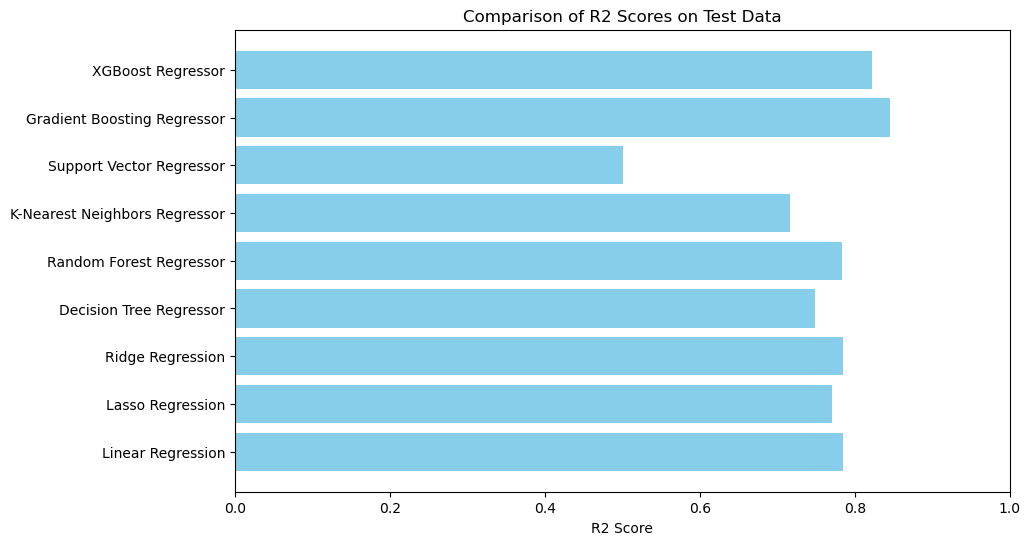

In [76]:
models = ['Linear Regression', 'Lasso Regression', 'Ridge Regression', 'Decision Tree Regressor',
'Random Forest Regressor', 'K-Nearest Neighbors Regressor', 'Support Vector Regressor', 'Gradient Boosting Regressor', 
          'XGBoost Regressor']
r2_scores = [linear_test, lasso_test, ridge_test, dtree_test, rfr_test, knn_test, svr_test, gb_test, xgb_test]

plt.figure(figsize=(10, 6))
plt.barh(models, r2_scores, color='skyblue')
plt.xlabel('R2 Score')
plt.title('Comparison of R2 Scores on Test Data')
plt.xlim(0, 1)
plt.show()

### Cross-Validation:

In [77]:
# Create a list of algorithms
algorithms = [
    LinearRegression(),
    Lasso(),
    Ridge(),
    SVR(),
    XGBRegressor(),
    RandomForestRegressor(),
    GradientBoostingRegressor()
]

# Create an empty dataframe to store the results
results_df = pd.DataFrame(columns=['Algorithm', 'Mean CV Score', 'Std CV Score'])

# Loop through each algorithm and perform cross-validation
for algo in algorithms:
    algo_name = algo.__class__.__name__
    cv_scores = cross_val_score(algo, x_train_normalized, y_train, cv=5, scoring='r2')
    mean_cv_score = cv_scores.mean()
    std_cv_score = cv_scores.std()
    
    results_df = results_df.append({
        'Algorithm': algo_name,
        'Mean CV Score': mean_cv_score,
        'Std CV Score': std_cv_score
    }, ignore_index=True)

# Sort the dataframe by Mean CV Score in descending order
results_df = results_df.sort_values(by='Mean CV Score', ascending=False)

# Display the results dataframe
print(results_df)

                   Algorithm  Mean CV Score  Std CV Score
0           LinearRegression       0.784916      0.039047
2                      Ridge       0.773808      0.053975
5      RandomForestRegressor       0.756103      0.050294
6  GradientBoostingRegressor       0.737512      0.055826
4               XGBRegressor       0.695301      0.072350
3                        SVR       0.535194      0.128500
1                      Lasso      -0.065028      0.069924


### GridSearchCV on Linear Regression:

In [78]:
linear_reg = LinearRegression()
param_grid = {'normalize': [True, False]}

grid_search = GridSearchCV(linear_reg, param_grid, cv=5, scoring='r2')
grid_search.fit(x_train_normalized, y_train)

GridSearchCV(cv=5, estimator=LinearRegression(),
             param_grid={'normalize': [True, False]}, scoring='r2')

In [79]:
# Get the best parameters
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

Best Parameters: {'normalize': True}


In [80]:
linear_reg = LinearRegression(**best_params)
linear_reg.fit(x_train_normalized, y_train)

LinearRegression(normalize=True)

In [81]:
y_pred_grid_train = linear_reg.predict(x_train_normalized)
y_pred_grid_test = linear_reg.predict(x_test_normalized)

In [82]:
grid_train = r2_score(y_train, y_pred_grid_train)
print('R2_score on train data using Linear Regressor (Tuned) is:', grid_train)

R2_score on train data using Linear Regressor (Tuned) is: 0.8437451437729853


In [86]:
grid_test = r2_score(y_test, y_pred_grid_test)
print('R2_score on test data using Linear Regressor (Tuned) is:', grid_test)

R2_score on test data using Linear Regressor (Tuned) is: 0.784941468568747
